# Simple Linear Regression 

In [1]:
# ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

### step 1 - data ingestion
### reading the file 


In [2]:
import pandas as pd 
df= pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## step 2 - perform basic data quality checks 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## step 3 - performing visualization

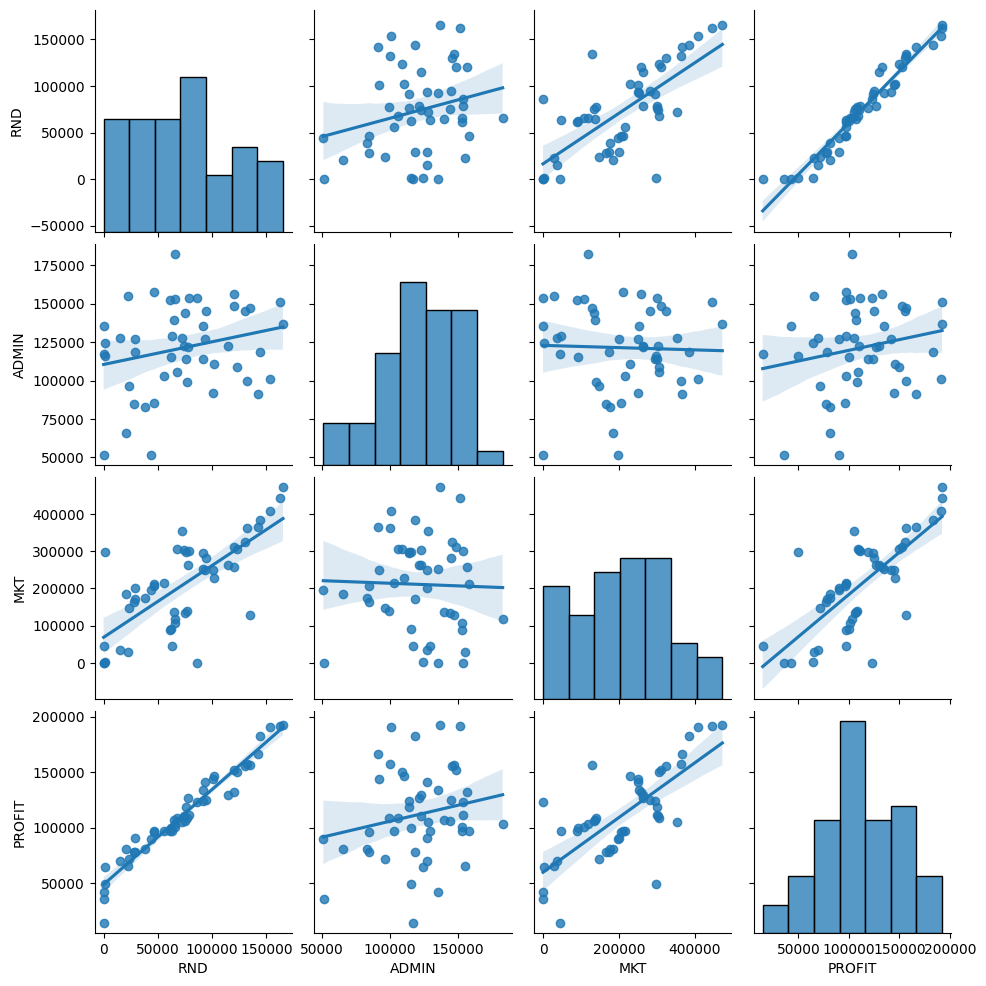

In [10]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [11]:
df.corr(numeric_only="True")

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


## profit ~ rnd
## profit = b0 + b1*rnd
## target- profit, predictor - rnd
## step 4 - seperate X(rnd) and Y(profit)

In [3]:
X= df[["RND"]]
Y= df[["PROFIT"]]

In [14]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## step 5- apply machine learning model - linear reg

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

## check slope and intercept values

In [12]:
model.intercept_

array([49032.89914125])

In [19]:
model.coef_

array([[0.85429137]])

## PROFIT_pred = 49032.8 + 0.8543xRND
## If RND increases by 1 unit PROFIT will increase by 0.8543 units on an average
## If RND increase by 1000 unit PROFIT will increase by 854.3 units on an average
## Visulize straight line

In [20]:
import matplotlib.pyplot as plt

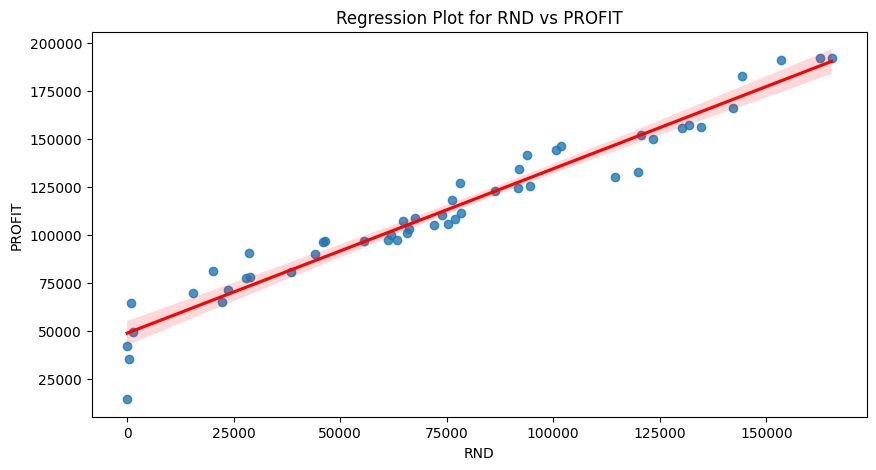

In [21]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})
plt.title("Regression Plot for RND vs PROFIT")
plt.show()


In [22]:
model.score(X,Y)

0.9465353160804393

## Evalute the model
## 1.Root Mean Squared Error (RMSE) : Standard error of the model
## 2.Mean Absolute Error (MAE)
## 3.Mean Absolute Percentage Error (MAPE)
## 4.R2 score

In [23]:
# R2 score for the model 
model.score(X,Y)

0.9465353160804393

In [24]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [25]:

from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [26]:
def evaluate_model(model, x, y):
    # Predict the resutls on x
    ypred = model.predict(x)

    # Calculate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE :  {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [27]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE :  6910.98
MAPE : 11.07%
R2 : 94.65%


## From above result R2 score > 80% hence it is a good model
## Out of sample prediction
## Estimate the profit based on given RND Value

In [4]:

X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [5]:

X.values[0:5]


array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [6]:
def predict_result(model, rnd):
    pred = model.predict([[rnd]])
    return pred

In [14]:

predict_result(model, 1_00_000)

c:\Users\hiral\Desktop\ETLhive all files\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[134462.03623513]])

In [15]:

predict_result(model, 60_000)

c:\Users\hiral\Desktop\ETLhive all files\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[100290.38139758]])

In [16]:
predict_result(model, 2_00_000)

c:\Users\hiral\Desktop\ETLhive all files\Machine Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[219891.17332901]])